# **Stock Pridiction Model**

### **Importing Dataset**

Importing Bitcoin  dataset from yahoo finance using pandas library past 15 years data.




In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 15, end.month, end.day)

# Fetch Bitcoin data
bitcoin = yf.download('BTC-USD', start, end)

# Add a column for the asset name
bitcoin["company_name"] = "BITCOIN"

# Display the last 10 rows
bitcoin


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,BITCOIN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,BITCOIN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,BITCOIN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,BITCOIN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,BITCOIN
...,...,...,...,...,...,...,...
2024-10-08,62221.644531,63174.304688,61843.562500,62131.968750,62131.968750,28134475157,BITCOIN
2024-10-09,62131.726562,62508.835938,60314.613281,60582.101562,60582.101562,27670982363,BITCOIN
2024-10-10,60581.929688,61236.722656,58895.207031,60274.500000,60274.500000,30452813570,BITCOIN


### **Descriptive Statistical Information**

In [12]:
bitcoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3.679000e+03
mean,18110.974706,18519.859798,17675.927253,18126.570946,18126.570946,1.769462e+10
std,19896.393510,20335.600244,19418.578533,19905.616500,19905.616500,1.915132e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1172.679993,1190.950012,1154.439941,1175.889954,1175.889954,3.130185e+08
50%,9202.458008,9358.589844,9032.079102,9205.726562,9205.726562,1.390308e+10
75%,29428.687500,30039.218750,29075.238281,29438.635742,29438.635742,2.868324e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


### **Information About Dataset**

In [13]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3679 entries, 2014-09-17 to 2024-10-13
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3679 non-null   float64
 1   High          3679 non-null   float64
 2   Low           3679 non-null   float64
 3   Close         3679 non-null   float64
 4   Adj Close     3679 non-null   float64
 5   Volume        3679 non-null   int64  
 6   company_name  3679 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 229.9+ KB


### **Historical View Of Closing Price**

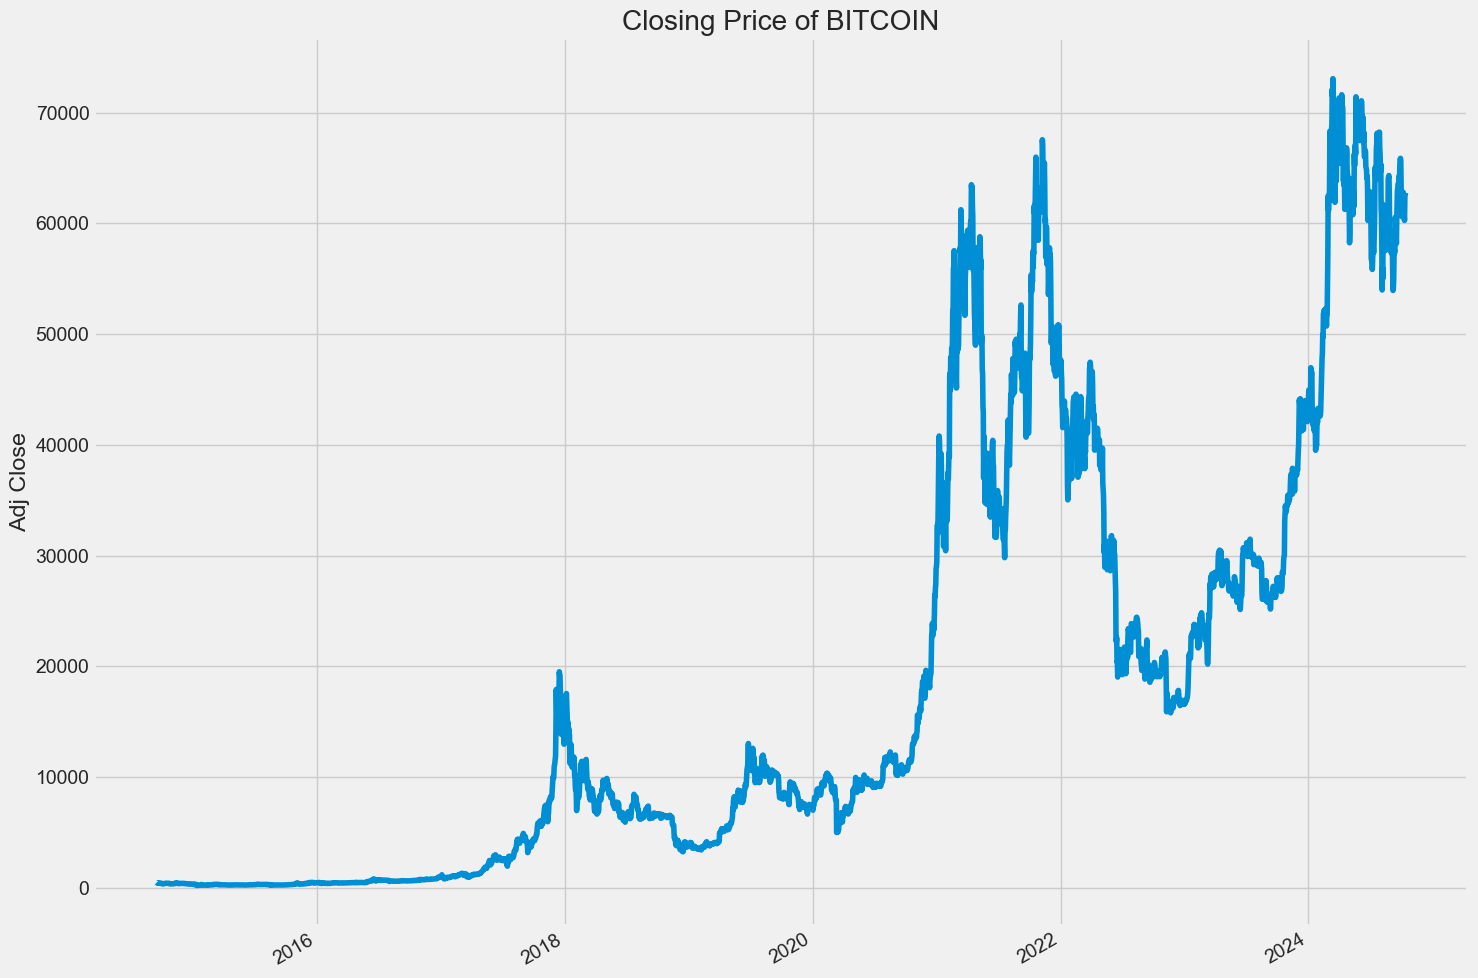

In [14]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Plotting the closing price
bitcoin['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of BITCOIN")
plt.tight_layout()


### **Volume Of Sales**

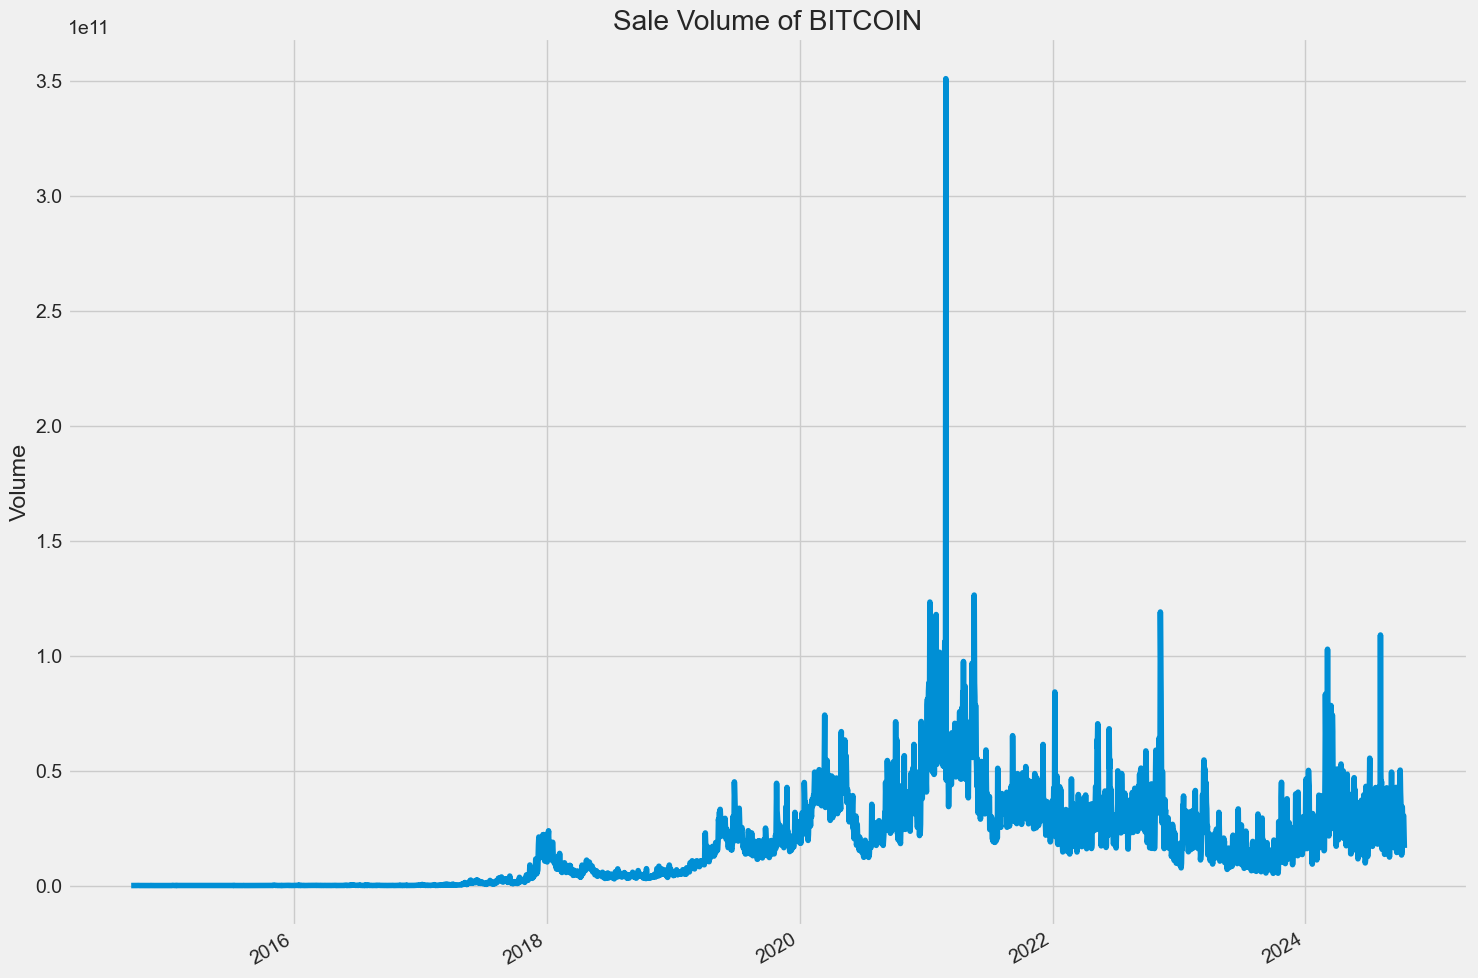

In [15]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Plotting the sale volume
bitcoin['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sale Volume of BITCOIN")
plt.tight_layout()


### **Moving Average of Bitcoin**

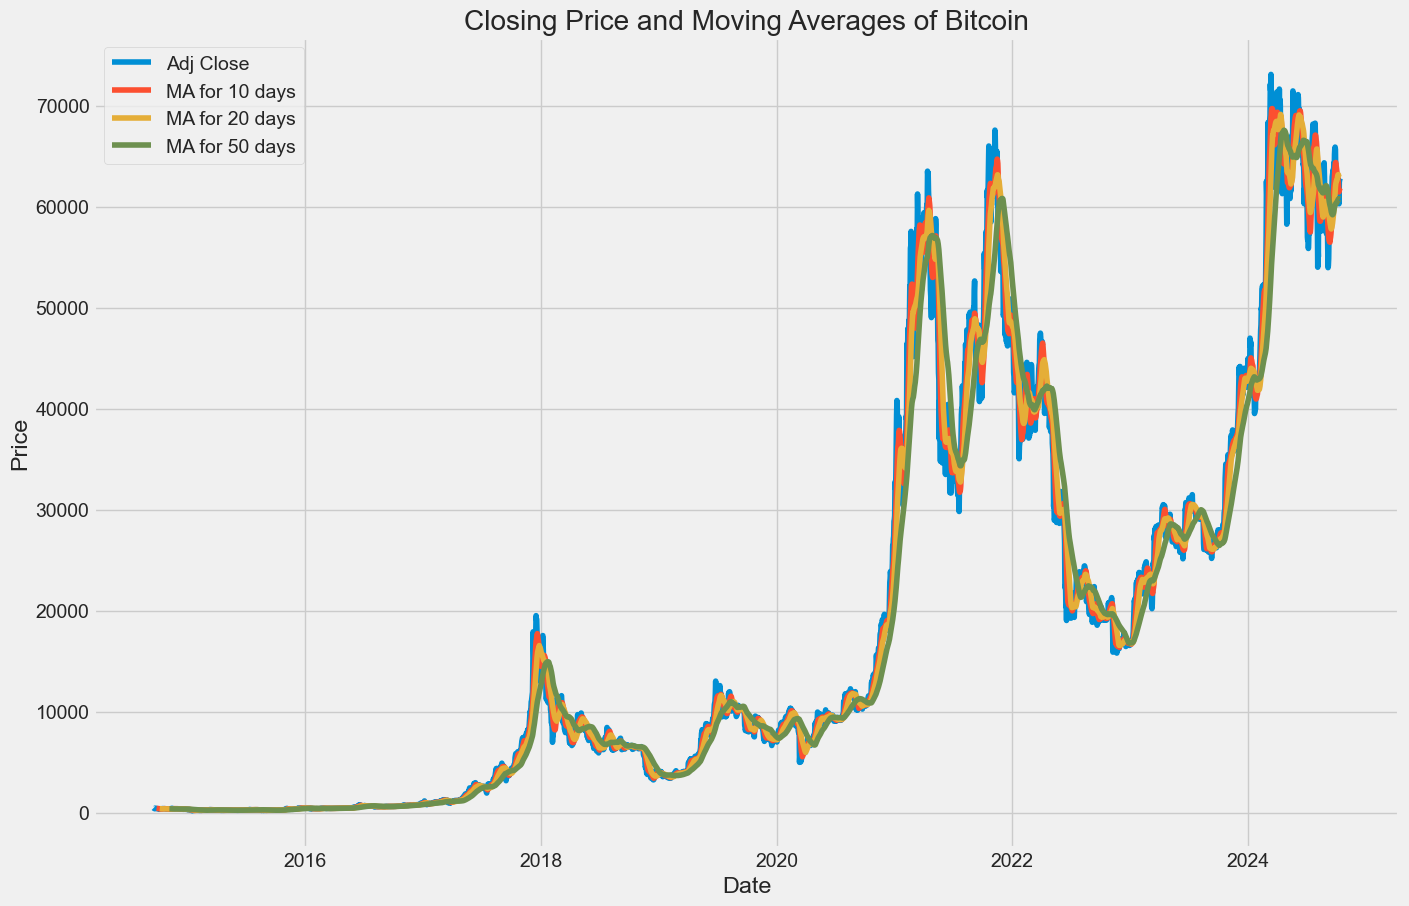

In [16]:
# Calculate moving averages
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    bitcoin[column_name] = bitcoin['Adj Close'].rolling(ma).mean()

# Plot closing price and moving averages
plt.figure(figsize=(15, 10))
plt.plot(bitcoin['Adj Close'], label='Adj Close')
plt.plot(bitcoin['MA for 10 days'], label='MA for 10 days')
plt.plot(bitcoin['MA for 20 days'], label='MA for 20 days')
plt.plot(bitcoin['MA for 50 days'], label='MA for 50 days')

plt.title("Closing Price and Moving Averages of Bitcoin")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


### **Calculating The Daily Returns**

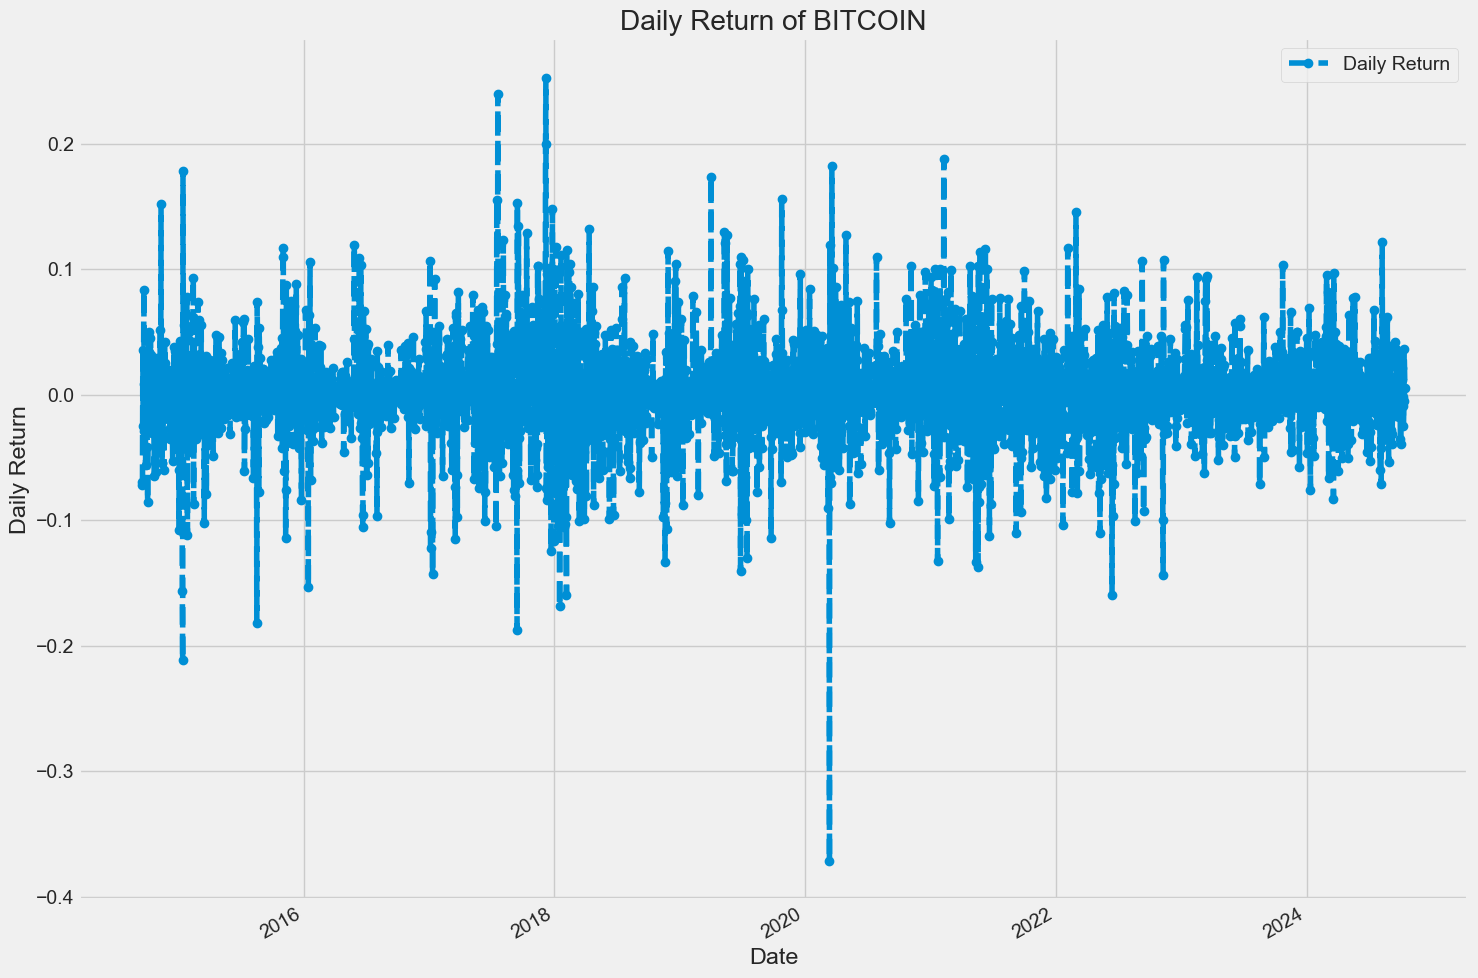

In [17]:
# Calculate daily return
bitcoin['Daily Return'] = bitcoin['Adj Close'].pct_change()

# Plot daily return
plt.figure(figsize=(15, 10))
bitcoin['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.title('Daily Return of BITCOIN')
plt.ylabel('Daily Return')
plt.xlabel('Date')
plt.tight_layout()

plt.show()

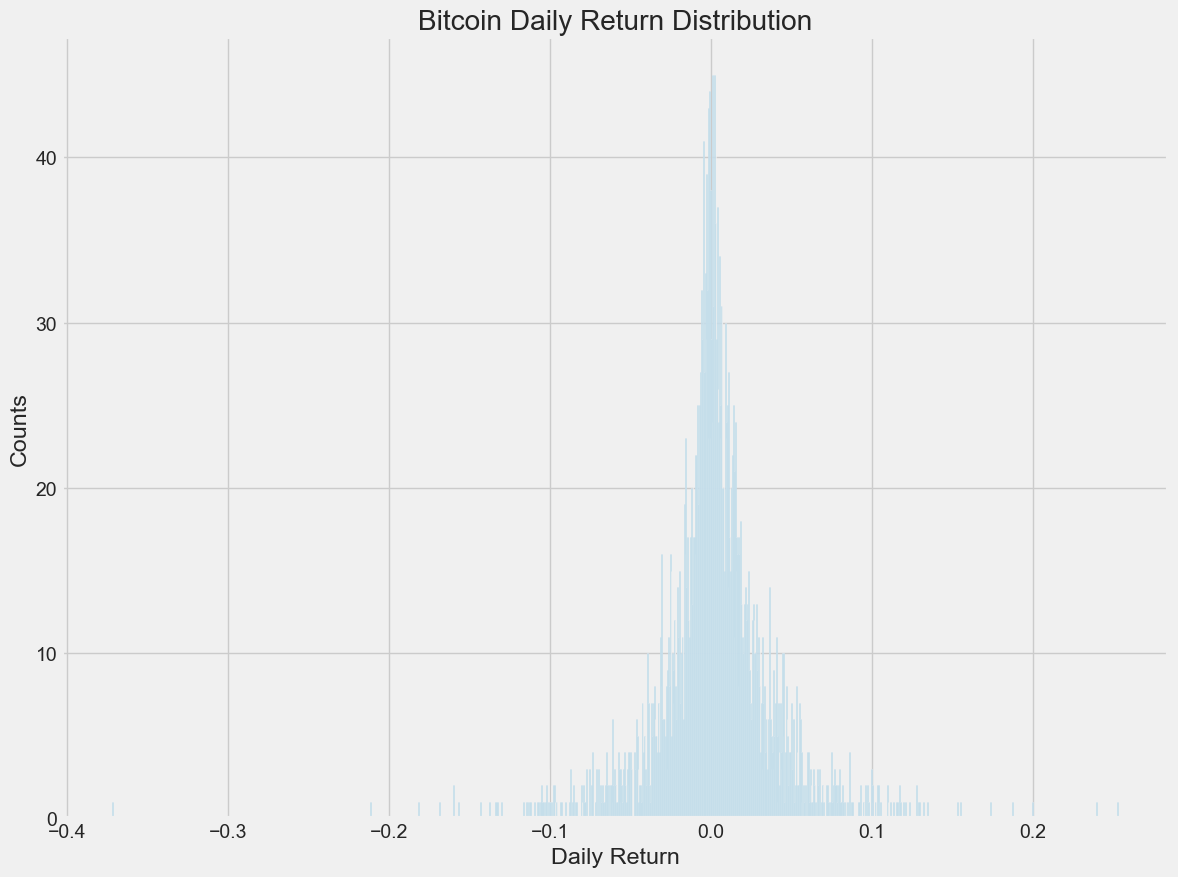

In [20]:

# Plot histogram of daily returns
plt.figure(figsize=(12, 9))
bitcoin['Daily Return'].hist(bins=1500)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Bitcoin Daily Return Distribution')
plt.tight_layout()
plt.show()

### **Predicting the closing price**


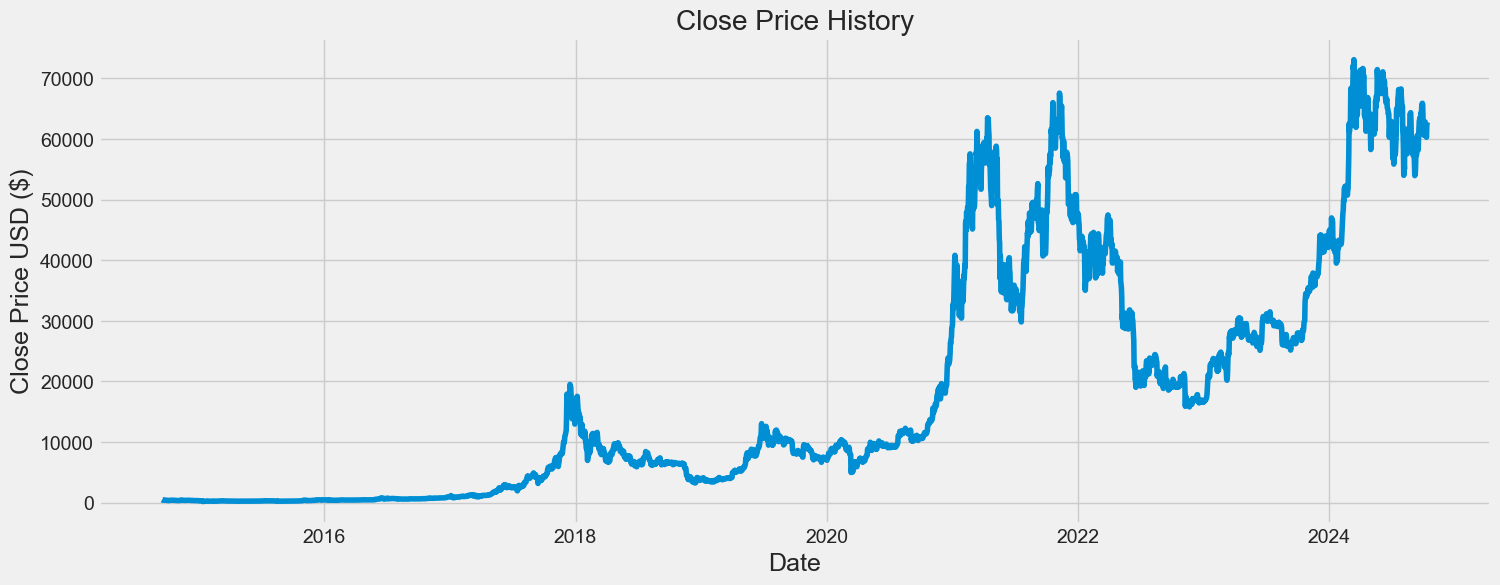

In [21]:
plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(bitcoin['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

[*********************100%***********************]  1 of 1 completed


Epoch 1/50


C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 - 7s - 75ms/step - loss: 0.0439
Epoch 2/50
89/89 - 3s - 32ms/step - loss: 0.0116
Epoch 3/50
89/89 - 3s - 33ms/step - loss: 0.0111
Epoch 4/50
89/89 - 3s - 32ms/step - loss: 0.0096
Epoch 5/50
89/89 - 3s - 33ms/step - loss: 0.0086
Epoch 6/50
89/89 - 3s - 33ms/step - loss: 0.0094
Epoch 7/50
89/89 - 3s - 32ms/step - loss: 0.0101
Epoch 8/50
89/89 - 3s - 33ms/step - loss: 0.0080
Epoch 9/50
89/89 - 3s - 32ms/step - loss: 0.0076
Epoch 10/50
89/89 - 3s - 32ms/step - loss: 0.0075
Epoch 11/50
89/89 - 3s - 32ms/step - loss: 0.0074
Epoch 12/50
89/89 - 3s - 32ms/step - loss: 0.0071
Epoch 13/50
89/89 - 3s - 32ms/step - loss: 0.0084
Epoch 14/50
89/89 - 3s - 32ms/step - loss: 0.0077
Epoch 15/50
89/89 - 3s - 31ms/step - loss: 0.0076
Epoch 16/50
89/89 - 3s - 34ms/step - loss: 0.0090
Epoch 17/50
89/89 - 3s - 33ms/step - loss: 0.0082
Epoch 18/50
89/89 - 3s - 37ms/step - loss: 0.0073
Epoch 19/50
89/89 - 3s - 35ms/step - loss: 0.0069
Epoch 20/50
89/89 - 3s - 34ms/step - loss: 0.0073
Epoch 21/50
89/89 - 

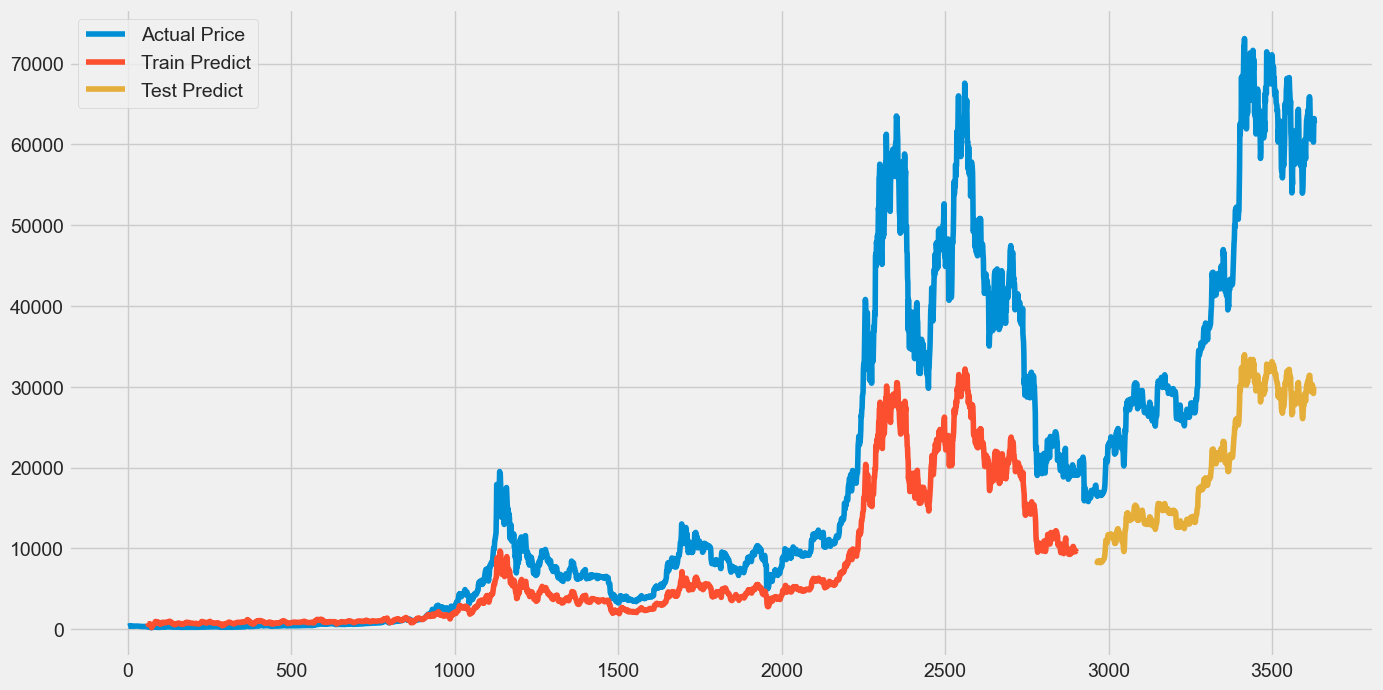

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Set up end and start times for data grab
end = datetime.now()
start = datetime(end.year - 15, end.month, end.day)

# Fetch Bitcoin data
bitcoin = yf.download('BTC-USD', start=start, end=end)

# Add a column for the asset name
bitcoin["company_name"] = "BITCOIN"

# Calculate moving averages
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    bitcoin[column_name] = bitcoin['Adj Close'].rolling(ma).mean()

# Calculate daily return
bitcoin['Daily Return'] = bitcoin['Adj Close'].pct_change()

# Add more technical indicators (e.g., Relative Strength Index)
bitcoin['RSI'] = bitcoin['Adj Close'].rolling(window=14).apply(lambda x: (100 - (100 / (1 + (x.pct_change().mean() / x.pct_change().std())))))

# Drop NaN values
bitcoin.dropna(inplace=True)

# Feature selection and scaling
features = ['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return', 'RSI']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bitcoin[features])

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step)])
        Y.append(dataset[i + time_step, 0])  # Predicting 'Adj Close'
    return np.array(X), np.array(Y)

time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshape for LSTM
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

# Compile and fit LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, Y_train, epochs=50, batch_size=32, verbose=2)  # Adjusted hyperparameters

# Predict with LSTM
train_predict_lstm = lstm_model.predict(X_train_lstm)
test_predict_lstm = lstm_model.predict(X_test_lstm)

# Inverse transform predictions
train_predict_lstm_full = scaler.inverse_transform(np.concatenate((train_predict_lstm, np.zeros((train_predict_lstm.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]
test_predict_lstm_full = scaler.inverse_transform(np.concatenate((test_predict_lstm, np.zeros((test_predict_lstm.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]

# Match lengths of LSTM and RF predictions
min_len = min(len(train_predict_lstm_full), len(train_data))
train_predict_lstm = train_predict_lstm_full[:min_len]
train_data = train_data[:min_len]

min_len = min(len(test_predict_lstm_full), len(test_data))
test_predict_lstm = test_predict_lstm_full[:min_len]
test_data = test_data[:min_len]

# For Random Forest
rf_model = RandomForestRegressor(n_estimators=100)
X_train_rf = train_data[:, :-1]
Y_train_rf = train_data[:, 0]
X_test_rf = test_data[:, :-1]
Y_test_rf = test_data[:, 0]

# Fit and predict with Random Forest
rf_model.fit(X_train_rf, Y_train_rf)
train_predict_rf = rf_model.predict(X_train_rf)
test_predict_rf = rf_model.predict(X_test_rf)

# Combine LSTM and Random Forest predictions
combined_train_predict = (train_predict_lstm + train_predict_rf) / 2
combined_test_predict = (test_predict_lstm + test_predict_rf) / 2

# Plot predictions
plt.figure(figsize=(15, 8))
plt.plot(scaler.inverse_transform(scaled_data)[:, 0], label='Actual Price')
plt.plot(range(time_step, len(combined_train_predict) + time_step), combined_train_predict, label='Train Predict')
plt.plot(range(len(combined_train_predict) + (time_step * 2), len(combined_train_predict) + (time_step * 2) + len(combined_test_predict)), combined_test_predict, label='Test Predict')
plt.legend()
plt.show()
